## Obtaining Calibrated Probabilities

Classifiers are commonly used in risk-critical applications but they pose a concern to practictioners. Classification accuracy is not a proper accuracy scoring role. It is a discontinuous metric applied to probability forecasts. However for applications where assessment of risk is important such discontinuities, where outcomes can change significantly because of a tiny jump in probability, can be misleading. Instead it is better to produce continuous probability scores and use them to take decisions. These scores can then be assessed using proper scoring rules such as the Brier Score and the logarithmic scoring rule. Brier Scores are easy to interpret and since they use a quadratic squared term can be decomposed into easy to understand components and hence are widely used especially in medicine. This brings us to the very important topic of calibration.

## Calibration

- A classifier is called well-calibrated if $\hat{P}(y = k | x) = P(y = k | x)$

Given a "calibration set" we can compute something called a calibration score:

- Divide [0,1] into M bins - these bins may be of equal width or equal quantiles according to $\hat{P}(y=k|x)$

- For each bin get the mean probability for each observation with probabilities predicted falling into that bin. Call it $\hat{P}(B_{k})$

- For each bin get the proportion of predictions that are correct. Call it $\bar{P}(B_{k})$

- The Calibration Error is $\Sigma^{M}_{n=1}[\hat{P}(B_{k}) - \bar{P}(B_{k})]^2$ 

A well-calibrated classifier minimizes this error term. A visual of the above is called a "Reliability Diagram".

We can also compute something called the "Brier score" which is defined as follows:

- Brier Score= $\frac{1}{M}\Sigma_{b}P(B_{b})[\hat{P}(B_{k)} -\bar{P}(B_{k})]^2 + \frac{1}{M}\Sigma_{b}P(B_{k})[\hat{P}(B_{k})(1-\hat{P}(B_{k})]$

The first term you'll recognize as the "Calibration Error". The second is something called a Refinement Score. So this scoring metric mesures calibration and sharpness of a classifier. An ideal classifier is well calibrated and highly confident in its predictions.

## Advantages of Calibration

- Optimal Decision Making
As mentioned above continuous scoring metrics are better at making decisions than discontinuous metrics to derive decision rules. If you have a loss function that depends on 

- Improved Accuracy

- Helps Combining with other subsystems

## Ways of achieving calibration

- Binning
Take your classifier's probabilities. Divide them into M bins. Take the average in each bin. Now you have a piecewise constant function. Use this instead. 

- Platt Scaling
This method was originally invented to convert scores into probabilities over classes for algorithms such as the Perceptron and Support Vector Machines by noting that those scores could be fit well by a sigmoid function. We can do the same thing here by fitting the output probabilties with a sigmoid function and scaling the probabilities such that they form a smoother function. This has been shown to work well for max-margin classifiers like SVMs and Boosted Trees.

- Isotonic Regression
This method tries to find a function g that is monotonically increasing from 0 to 1 and minimizes the calibration error. The algorithm that solves this problem is called a Pool-Adjacent Violators Algorithm and fits a piecewise linear function. What this algorithm achieves is a more sophisticated version of the binning algorithm described but where the bins are learned from the data itself instead of being prespecified.

In [2]:
import os
os.chdir("../../models/")
path = os.getcwd()

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.calibration import calibration_curve
df_lgb = pd.read_csv('classification_lightgbm_amazon_insample.csv')
df_xgb = pd.read_csv('classification_xgboost_amazon_insample.csv')

In [5]:
df_xgb_bin = pd.read_csv('xgboost__binning_calibratedpreds.csv')
df_lgb_bin = pd.read_csv('lightgbm__binning_calibratedpreds.csv')
df_xgb_sig = pd.read_csv('xgboost__sigmoid_calibratedpreds.csv')
df_lgb_sig = pd.read_csv('lightgbm__sigmoid_calibratedpreds.csv')
#df_xgb_iso = pd.read_csv('xgboost__isotonic_calibratedpreds.csv')
df_lgb_iso = pd.read_csv('lightgbm__isotonic_calibratedpreds.csv')

In [24]:
fraction_of_positives, mean_predicted_value = \
calibration_curve(df_xgb['target'], df_xgb['prediction'], n_bins = 10)

fraction_of_positives_2, mean_predicted_value_2 = \
calibration_curve(df_lgb['target'], df_lgb['prediction'], n_bins = 10)

fraction_of_positives_3, mean_predicted_value_3 = \
calibration_curve(df_lgb_iso['actual'], df_lgb_iso['prediction'], n_bins = 10)

fraction_of_positives_4, mean_predicted_value_4 = \
calibration_curve(df_lgb_sig['actual'], df_lgb_sig['prediction'], n_bins = 10)

fraction_of_positives_5, mean_predicted_value_5 = \
calibration_curve(df_xgb_bin['actual'], df_xgb_bin['prediction'], n_bins = 10)

fraction_of_positives_6, mean_predicted_value_6 = \
calibration_curve(df_xgb_sig['actual'], df_xgb_sig['prediction'], n_bins = 10)





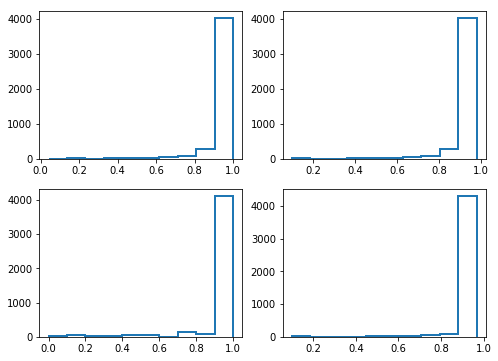

In [11]:
fig = plt.figure(figsize = (8,6))

plt.subplot(2, 2, 1)
plt.hist(df_lgb['prediction'], histtype = 'step', lw = 2)

plt.subplot(2, 2, 2)
plt.hist(df_lgb_bin['prediction'], histtype = 'step', lw = 2)

plt.subplot(2, 2, 3)
plt.hist(df_lgb_iso['prediction'], histtype = 'step', lw = 2)

plt.subplot(2, 2, 4)
plt.hist(df_lgb_sig['prediction'], histtype = 'step', lw = 2)
plt.show()

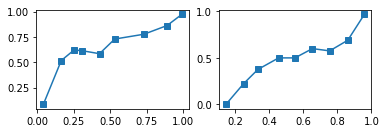

In [28]:
plt.subplot(2, 2, 1)
calibration_curve(df_lgb_iso['actual'], df_lgb_iso['prediction'], n_bins = 10)
plt.plot(mean_predicted_value_3, fraction_of_positives_3, "s-")

plt.subplot(2, 2, 2)
calibration_curve(df_lgb_sig['actual'], df_lgb_sig['prediction'], n_bins = 10)
plt.plot(mean_predicted_value_4, fraction_of_positives_4, "s-")



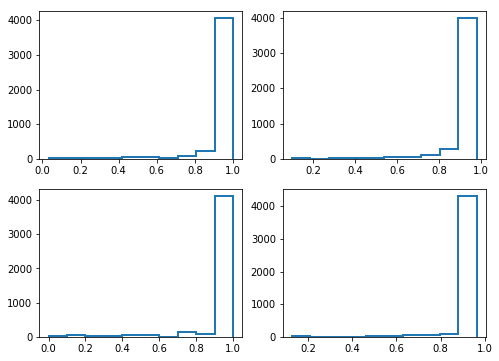

In [23]:
fig = plt.figure(figsize = (8,6))

plt.subplot(2, 2, 1)
plt.hist(df_xgb['prediction'], histtype = 'step', lw = 2)

plt.subplot(2, 2, 2)
plt.hist(df_xgb_bin['prediction'], histtype = 'step', lw = 2)

plt.subplot(2, 2, 3)
plt.hist(df_lgb_iso['prediction'], histtype = 'step', lw = 2)

plt.subplot(2, 2, 4)
plt.hist(df_xgb_sig['prediction'], histtype = 'step', lw = 2)

plt.show()

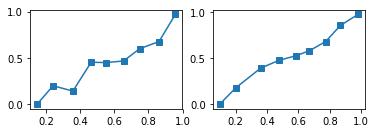

In [27]:
plt.subplot(2, 2, 2)
calibration_curve(df_xgb_bin['actual'], df_xgb_bin['prediction'], n_bins = 10)
plt.plot(mean_predicted_value_5, fraction_of_positives_5, "s-")

plt.subplot(2, 2, 1)
calibration_curve(df_xgb_sig['actual'], df_xgb_sig['prediction'], n_bins = 10)
plt.plot(mean_predicted_value_6, fraction_of_positives_6, "s-")


